In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names

col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

### Iris setosa

![setosa](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)

### Iris versicolor

![versicolor](https://dkpo4ygqb6rh6.cloudfront.net/APPELTERN_NL/imageresized/89285/ebacd3d38374a559a7782a111c456404/1320_880_80_normaljpg/iris_versicolor_lis_violenkruid.jpg)

### Iris virginica

![virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1920px-Iris_virginica_2.jpg)

In [209]:
def make_plot(**kwargs):
    sns.scatterplot(**kwargs)

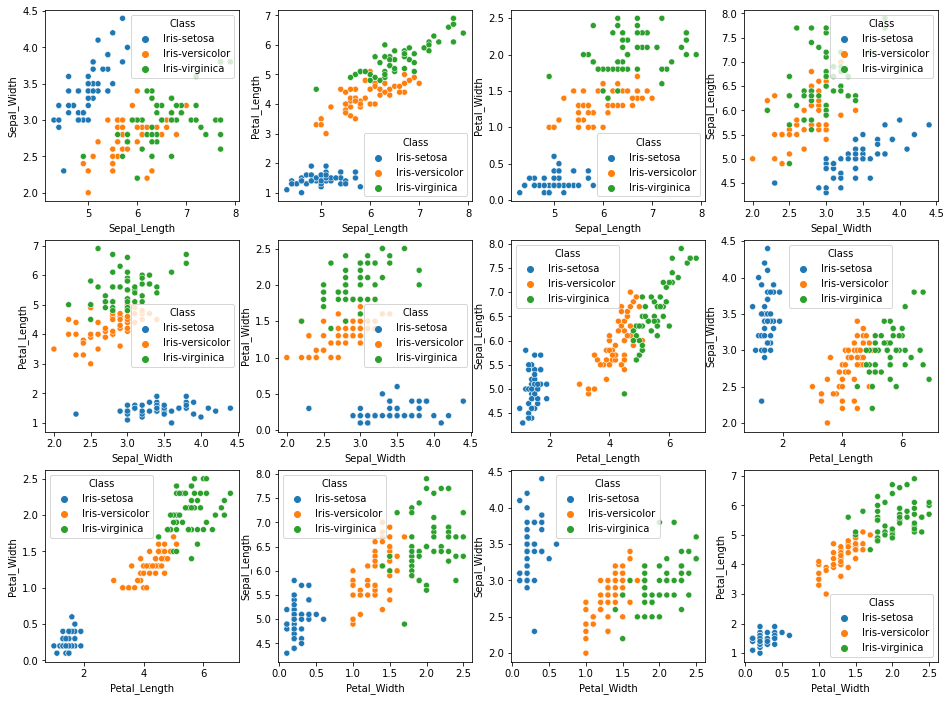

In [210]:
variables = iris.drop("Class", axis=1).columns

groupings = [{"x": f'{x}', "y": f'{y}'}#, "hue": '"Class"', "data": "iris"} 
             for x in variables for y in variables if x != y]

fig, ax = plt.subplots( 3,4 , figsize=(16,12))

plots = [make_plot(**d, 
                   hue="Class", 
                   data=iris, 
                   ax = ax.flatten()[i], 
                   legend=True) 
         
         for i, d in enumerate(groupings)]

## Arbitrary classification

In [211]:
iris_c = iris.copy()
iris = iris[iris.Class != "Iris-versicolor"]

Let's take one of our groupings and erase the labels. To simplify, we limit the problem to differentiating between _setosa_ and _virginica_.

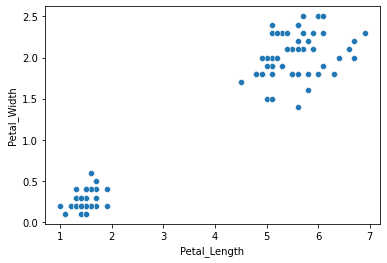

In [212]:
make_plot(**groupings[8], data=iris)

What if we draw a line through this plot, and use it as a classifier? 

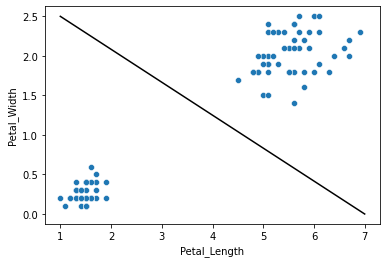

In [213]:
def get_y(x, line_params):
    return line_params["a"] * x + line_params["b"]

line_params = {"a": -(5/12), "b": 2.5 + (5/12)}

make_plot(**groupings[8], data=iris[iris["Class"] != "Iris-versicolor"])

plt.plot([1,                     7], 
         [get_y(1, line_params), get_y(7, line_params)], 
         'k-')

plt.show()

Everything left of the line we'll classify as _setosa_, and everything top-right we'll classify as _virginica_.

In [214]:
iris["Prediction"] = \
    (iris['Petal_Length'].apply(get_y, line_params = line_params) > iris['Petal_Width']) \
     .apply(lambda x: "Iris-setosa" if x else "Iris-virginica")

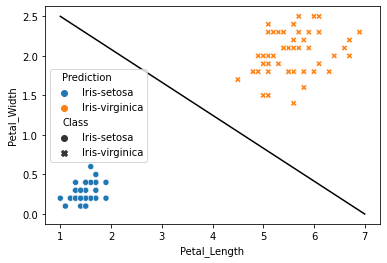

In [215]:
make_plot(**groupings[8], hue="Prediction", style='Class', data=iris)

plt.plot([1,                     7], 
         [get_y(1, line_params), get_y(7, line_params)], 
         'k-')

# shade the areas
# add cross / circle depending on true label

plt.show()

Perfect classification! But what if the data is not linearly separable? We could try this for _virginica_ and _versicolor_...

In [216]:
iris = iris_c[iris_c['Class'] != 'Iris-setosa']

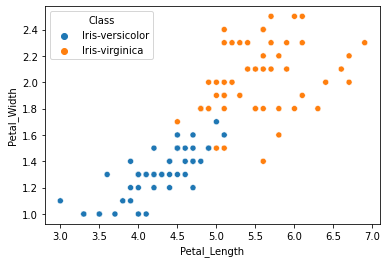

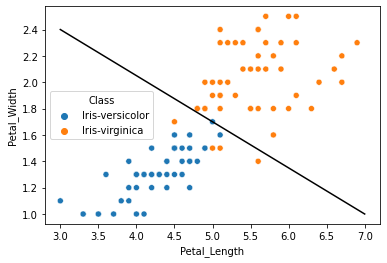

In [217]:
make_plot(**groupings[8], hue='Class', data=iris)

plt.show()

make_plot(**groupings[8], hue='Class', data=iris)
plt.plot([3,7],[2.4,1.0], 'k-')

plt.show()

/var/folders/j0/g10f_kns33v93fb8ngjn54hh0000gn/T/ipykernel_4523/391454135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris["Prediction"] = \


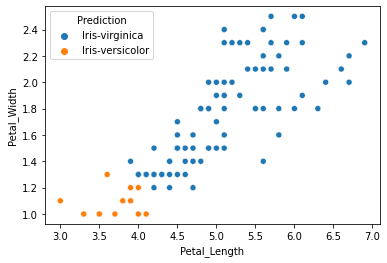

In [218]:
iris["Prediction"] = \
    (iris['Petal_Length'].apply(get_y, line_params = line_params) > iris['Petal_Width']) \
     .apply(lambda x: "Iris-versicolor" if x else "Iris-virginica")

make_plot(**groupings[8], hue="Prediction", data=iris)